In [3]:
# Imports
%matplotlib inline
import functools
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jax.tree_util as tree
import jraph
import flax
import haiku as hk
import optax
import pickle
import numpy as onp
import networkx as nx
from typing import Any, Callable, Dict, List, Optional, Tuple

In [4]:
def build_toy_graph()->jraph.GraphsTuple:
#Define a four node graph, each node has a scalar as its feature."
# Nodes are defined implicitly by their features.
# We will add four nodes, each with a feature, e.g.
# node has feature [0.],
# node 1 has featre [2.] etc.
# len(node_features) is the number of nodes.
    node_features = jnp.array([[0.], [2.], [4.], [6.]])
# We will now specify 5 directed edges connecting the nodes we defined above. # We define this with 'senders (source node indices) and receivers
# (destination node indices).
# For example, to add an edge from node e to node 1, we appende to senders, # and 1 to receivers.
# We can do the same for all 5 edges:
# 0 -> 1
#1 -> 2
#2 -> 0
#3 -> 0
# 0 -> 3
    senders=jnp.array([0, 1, 2, 3, 0])
    receivers=jnp.array([1, 2, 0, 0, 3])

# You can optionally add edge attributes to the 5 edges.
    edges =jnp.array([[5.], [6.], [7.], [8.], [8.]])

# We then save the number of nodes and the number of edges.
# This information is used to make running GNNS over multiple graphs
# in a Graphs Tuple possible.
    n_node = jnp.array([4])
    n_edge=jnp.array([5])
# Optionally you can add global information, such as a graph label.
    global_context = jnp.array([[1]]) # Same feature dims as nodes and edges.
    graph =jraph.GraphsTuple(nodes=node_features,edges=edges,senders=senders,receivers=receivers,n_node=n_node,n_edge=n_edge,globals=global_context)
    return graph

In [5]:
graph = build_toy_graph()

In [6]:
graph.n_node

Array([4], dtype=int32)

In [7]:
graph.n_edge

Array([5], dtype=int32)

In [8]:
graph.nodes

Array([[0.],
       [2.],
       [4.],
       [6.]], dtype=float32)

In [9]:
graph.senders

Array([0, 1, 2, 3, 0], dtype=int32)

In [10]:
graph.receivers

Array([1, 2, 0, 0, 3], dtype=int32)

In [11]:
def convert_jraph_to_networkx_graph (jraph_graph: jraph.GraphsTuple) -> nx.Graph:
  nodes, edges, receivers, senders,_,_,_=jraph_graph
  nx_graph=nx.DiGraph()
  if nodes is None:
    for n in range(jraph_graph.n_node[0]):
      nx_graph.add_node(n)
  else:
    for n in range(jraph_graph.n_node[0]):
      nx_graph.add_node (n, node_feature=nodes[n])
  if edges is None:
    for e in range (jraph_graph.n_edge[0]):
      nx_graph.add_edge(int(senders [e]), int (receivers [e]))
  else:
    for e in range (jraph_graph.n_edge[0]):
      nx_graph.add_edge(
        int (senders [e]), int (receivers [e]), edge_feature=edges[e])
  return nx_graph


In [12]:
def draw_jraph_graph_structure (jraph_graph: jraph.GraphsTuple) -> None:
    nx_graph = convert_jraph_to_networkx_graph (jraph_graph)
    pos=nx.spring_layout (nx_graph)
    nx.draw(nx_graph, pos=pos, with_labels=True, node_size=500, font_color="yellow")


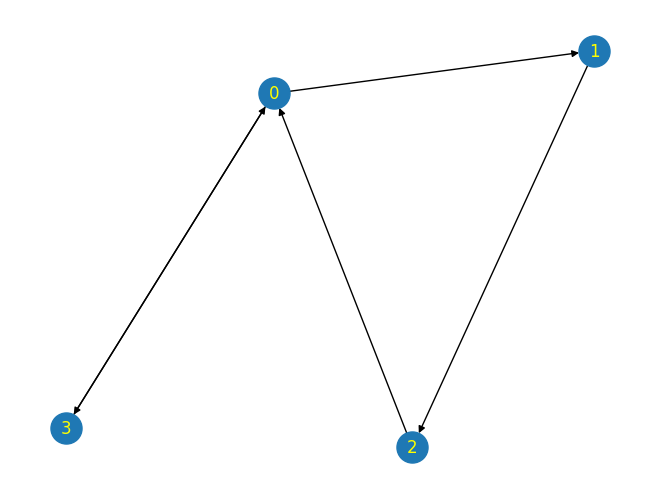

In [13]:
draw_jraph_graph_structure(graph)

**Exercise: Make the necessary modifications to represent the following graph:**

In [15]:
def build_toy_graph2() -> jraph.GraphsTuple:
  """Define a four node graph, each node has a scalar as its feature."""
  node_features = jnp.array([[0.],[2.],[4.],[6.],[8.],[10.]])

  #5 directed edges connecting the 4 nodes
  # 0 -> 1
  # 1 -> 2
  # 2 -> 0
  # 3 -> 0
  # 0 -> 3
  senders = jnp.array([0,0,1,1,2,3,4,5])
  receivers = jnp.array([1,2,1,3,0,4,2,0])

  edges = jnp.array([[3.],[4.],[5.],[6.], [7.], [8.], [8.]])

  #save number of edges and nodes
  n_node = jnp.array([6])
  n_edge = jnp.array([8])

  global_context= jnp.array([1])
  graph =jraph.GraphsTuple(
      nodes=node_features,
      edges=edges,
      senders=senders,
      receivers=receivers,
      n_node=n_node,
      n_edge=n_edge,
      globals=global_context
      )
  return graph

#a graph is represented with a GraphsTuple object

In [16]:
graph2 = build_toy_graph2()

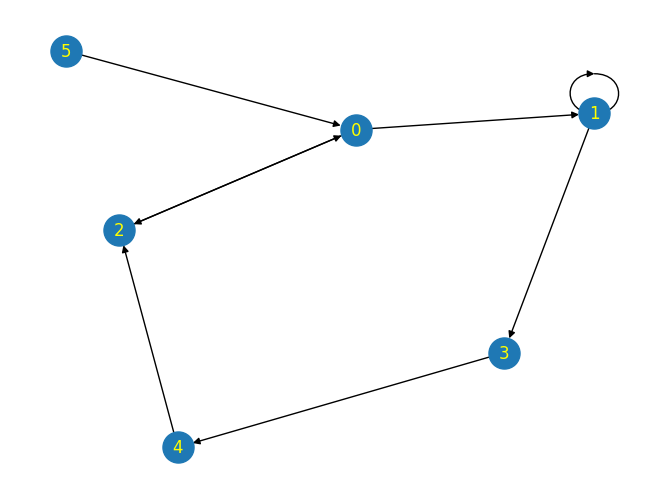

In [23]:
# use networkx lib, has functions for drawing graphs

def convert_jraph_to_networkx_graph(jraph_graph: jraph.GraphsTuple) -> nx.Graph:
  nodes, edges , receivers, senders, _, _, _ = jraph_graph
  nx_graph = nx.DiGraph()
  if nodes is None:
    for n in range(jraph_graph.n_nodes[0]):
      nx_graph.add_node(n)
  else:
    for n in range(jraph_graph.n_node[0]):
      nx_graph.add_node(n, node_features=nodes[n])
  if edges is None:
    for e in range(jraph_graph.n_edge[0]):
      nx_graph.add_edge(int(senders[e]), int(receivers[e]))
  else:
    for e in range(jraph_graph.n_edge[0]):
      nx_graph.add_edge(
          int(senders[e]), int(receivers[e]), edge_feature=edges[e])
  return nx_graph

def draw_jraph_graph_stucture(jraph_graph: jraph.GraphsTuple) -> None:
  nx_graph = convert_jraph_to_networkx_graph(jraph_graph)
  pos= nx.spring_layout(nx_graph)
  nx.draw(
      nx_graph, pos=pos, with_labels=True, node_size=500, font_color='yellow')
draw_jraph_graph_stucture(graph2)